In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [184]:
df = pd.read_csv('../datasets/hypertension_dataset.csv')

In [186]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [190]:
df.describe()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.531688,4.979345,6.452242,26.015315
std,19.442042,1.994907,3.142303,1.542207,4.512857
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,23.000000
50%,50.000000,8.500000,5.000000,6.500000,25.900000
75%,67.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


<Axes: ylabel='Exercise_Level'>

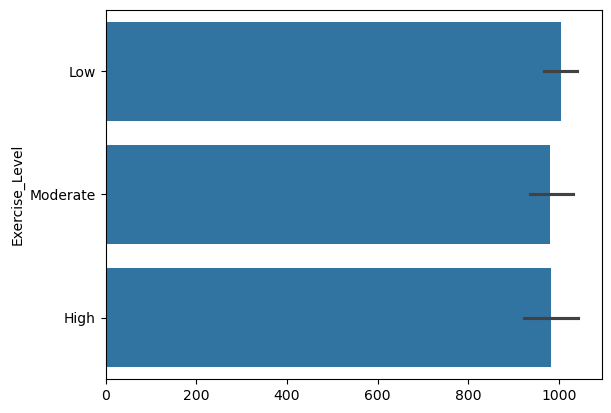

In [192]:
sns.barplot(df['Exercise_Level'])

In [194]:
df['Medication'] = df['Medication'].fillna('No Medication')

<Axes: ylabel='Medication'>

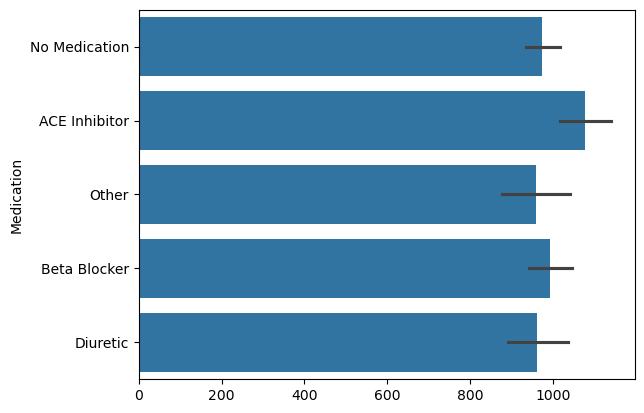

In [196]:
sns.barplot(df['Medication'])

<Axes: ylabel='BP_History'>

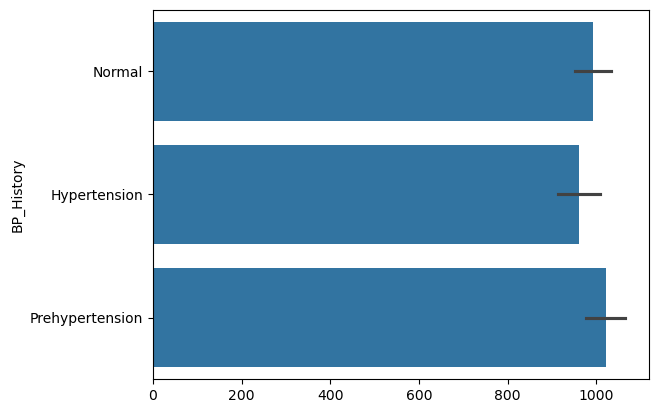

In [198]:
sns.barplot(df['BP_History'])

In [200]:
df['Has_Hypertension'].value_counts()

Has_Hypertension
Yes    1032
No      953
Name: count, dtype: int64

In [202]:
df['Smoking_Status'].value_counts()

Smoking_Status
Non-Smoker    1417
Smoker         568
Name: count, dtype: int64

In [204]:
df['BP_History'] = df['BP_History'].replace({'Normal': 0, 'Hypertension': 1, 'Prehypertension': 2})
df['Exercise_Level'] = df['Exercise_Level'].replace({'High': 0, 'Moderate': 1, 'Low': 2,})
df['Family_History'] = df['Family_History'].replace({'No': 0, 'Yes': 1,})
df['Has_Hypertension'] = df['Has_Hypertension'].replace({'No': 0, 'Yes': 1,})
df['Smoking_Status'] = df['Smoking_Status'].replace({'Non-Smoker': 0, 'Smoker': 1,})
df = pd.get_dummies(df, columns=['Medication'])

In [206]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension,Medication_ACE Inhibitor,Medication_Beta Blocker,Medication_Diuretic,Medication_No Medication,Medication_Other
0,69,8.0,9,0,6.4,25.8,1,2,0,1,False,False,False,True,False
1,32,11.7,10,0,5.4,23.4,0,2,0,0,False,False,False,True,False
2,78,9.5,3,0,7.1,18.7,0,1,0,0,False,False,False,True,False
3,38,10.0,10,1,4.2,22.1,0,2,0,1,True,False,False,False,False
4,41,9.8,1,2,5.8,16.2,0,1,0,0,False,False,False,False,True


In [210]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [218]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Has_Hypertension'], axis=1), df['Has_Hypertension'], random_state=3, stratify=df['Has_Hypertension'])

In [220]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488, 14), (497, 14), (1488,), (497,))

In [222]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [250]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 250)

random_forest.fit(X_train_scaled, y_train)
predictions = random_forest.predict(X_test_scaled)

In [251]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [254]:
def get_score(y_true, y_predicted):
    print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=predictions)}')
    print(f'Precision: {precision_score(y_true=y_test, y_pred=predictions)}')
    print(f'Recall: {recall_score(y_true=y_test, y_pred=predictions)}')
    print(f'F1 score: {f1_score(y_true=y_test, y_pred=predictions)}')

In [256]:
get_score(y_test, predictions)

Accuracy: 0.9577464788732394
Precision: 0.9471698113207547
Recall: 0.9728682170542635
F1 score: 0.9598470363288719
